# Time series

#### loading libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 9 
%matplotlib inline 

## Loading data(tractorsales)
    checking data types

In [84]:
data = pd.read_csv('TractorSales.csv')
print data.head()
print '\n data types:'
print data.dtypes

  Month-Year  Number of Tractor Sold
0     2003-1                     141
1     2003-2                     157
2     2003-3                     185
3     2003-4                     199
4     2003-5                     203

 data types:
Month-Year                object
Number of Tractor Sold     int64
dtype: object


# Data intuition
    "Month-Year" : (object) year month wise data
    "Number of Tractor Sold" : (int) no. of tractor sold in a month
    
##### Indexing  'Month-Year'

In [85]:
# formatting in year month format
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
tr_data = pd.read_csv('TractorSales.csv',index_col='Month-Year',date_parser=dateparse)
print tr_data.head()
print '\n data type :'
print tr_data.dtypes

            Number of Tractor Sold
Month-Year                        
2003-01-01                     141
2003-02-01                     157
2003-03-01                     185
2003-04-01                     199
2003-05-01                     203

 data type :
Number of Tractor Sold    int64
dtype: object


In [87]:
# Index of data
tr_data.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name=u'Month-Year', length=144, freq=None)

## Plotting data


#### by plotting we can see trend and seasonality of data

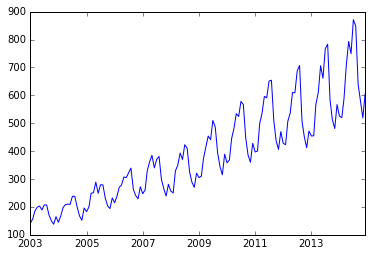

In [89]:
plt.plot(tr_data)

## Function To Check Dickey-Fuller test and to plot rolling mean and std of data

    test_stationarity()

In [94]:
# loading library adfuller to test data using Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

### using fuction to test data

C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


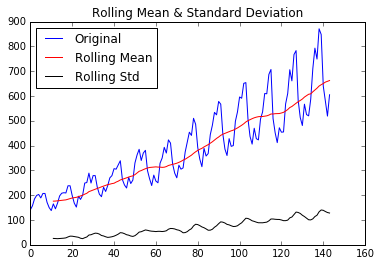

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (5%)             -2.884219
Critical Value (1%)             -3.482088
Critical Value (10%)            -2.578864
dtype: float64


In [96]:
test_stationarity(tr_data.values.ravel())

### this is not a stationary series
##### variation in standard deviation is small
##### mean is clearly increasing with time
##### Also, the test statistic is way more than the critical values

## log transform data to make data stationary on variance

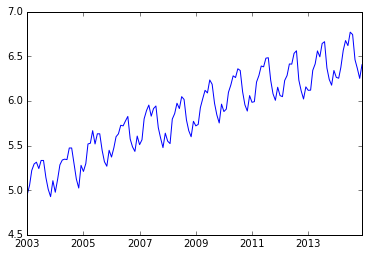

In [99]:
tr_log = np.log(tr_data)
plt.plot(tr_log)

##### Seasonallity is removed

## Plotting rolling mean to check trend

C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


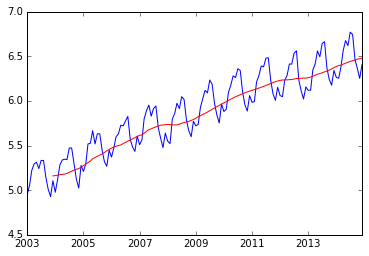

In [101]:
movng_avg = pd.rolling_mean(tr_log, 12)
plt.plot(tr_log)
plt.plot(movng_avg, color='red')

In [106]:
tr_log_mov_avg_diff = tr_log - movng_avg
tr_log_mov_avg_diff.head(14)

,Number of Tractor Sold
Month-Year,
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN
2003-07-01,NaN
2003-08-01,NaN
2003-09-01,NaN


C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


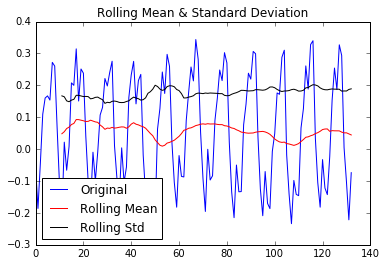

Results of Dickey-Fuller Test:
Test Statistic                  -3.043484
p-value                          0.031028
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [108]:
tr_log_mov_avg_diff.dropna(inplace=True)
test_stationarity(tr_log_mov_avg_diff.values.ravel())

C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


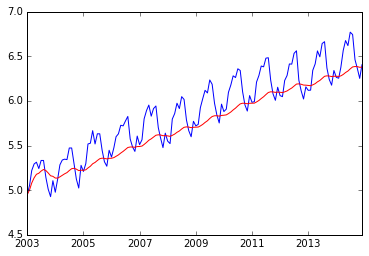

In [110]:
exp_weight = pd.ewma(tr_log, halflife=12)
plt.plot(tr_log)
plt.plot(exp_weight, color='red')

C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


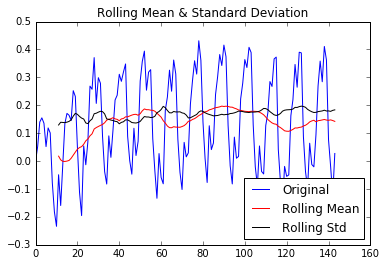

Results of Dickey-Fuller Test:
Test Statistic                  -4.035142
p-value                          0.001237
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [113]:
tr_exp_diff = tr_log - exp_weight
test_stationarity(tr_exp_diff.values.ravel())

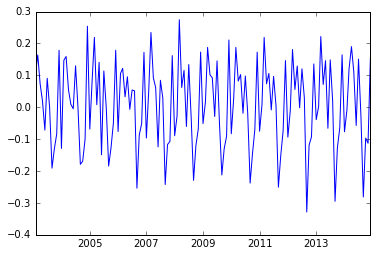

In [117]:
tr_sim_diff = tr_log - tr_log.shift()
plt.plot(tr_sim_diff)

C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


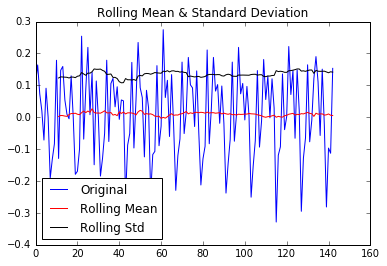

Results of Dickey-Fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [120]:
tr_sim_diff.dropna(inplace=True)
test_stationarity(tr_sim_diff.values.ravel())

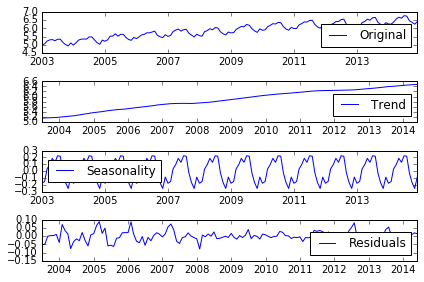

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tr_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(tr_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\pc\Anaconda2\envs\ipy_env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


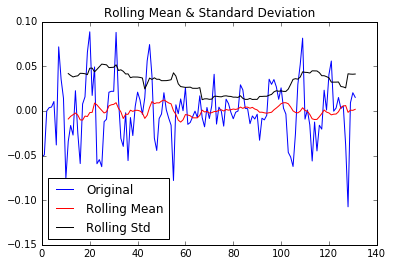

Results of Dickey-Fuller Test:
Test Statistic                -6.330971e+00
p-value                        2.907010e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [125]:
tr_log_decompose = residual
tr_log_decompose.dropna(inplace=True)
test_stationarity(tr_log_decompose.values.ravel())

In [128]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(tr_sim_diff, nlags=20)
lag_pacf = pacf(tr_sim_diff, nlags=20, method='ols')

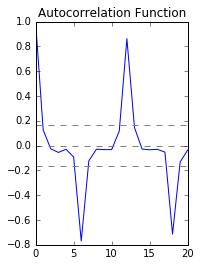

In [134]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tr_sim_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tr_sim_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

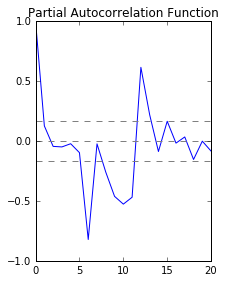

In [136]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tr_sim_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tr_sim_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [138]:
from statsmodels.tsa.arima_model import ARIMA

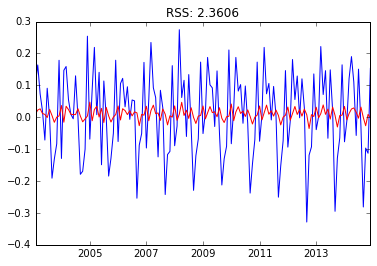

In [141]:
#AR Model
model = ARIMA(tr_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(tr_sim_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-tr_sim_diff.values.ravel())**2))

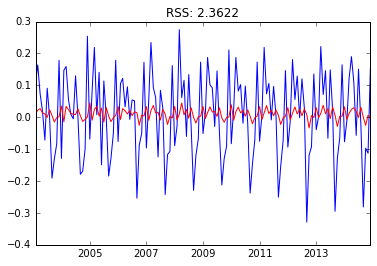

In [143]:
#MA model
model = ARIMA(tr_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(tr_sim_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-tr_sim_diff.values.ravel())**2))

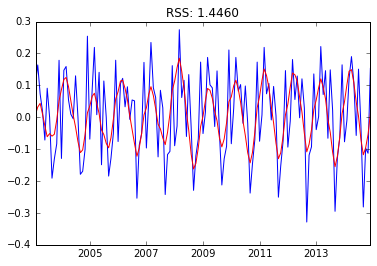

In [145]:
#combined Model (ARIMA)
model = ARIMA(tr_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(tr_sim_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tr_sim_diff.values.ravel())**2))

In [147]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print pred_ARIMA_diff.head()

Month-Year
2003-02-01    0.009673
2003-03-01    0.032047
2003-04-01    0.043628
2003-05-01    0.010497
2003-06-01   -0.027392
dtype: float64


In [149]:
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
print pred_ARIMA_diff_cumsum.head()

Month-Year
2003-02-01    0.009673
2003-03-01    0.041719
2003-04-01    0.085348
2003-05-01    0.095845
2003-06-01    0.068453
dtype: float64


In [152]:
predictions_ARIMA_log = pd.Series(tr_log.ix[0].ravel(), index=tr_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()
tr_log.ix[0]

Number of Tractor Sold    4.94876
Name: 2003-01-01 00:00:00, dtype: float64

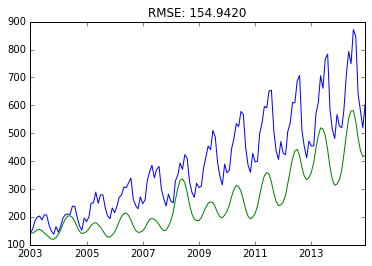

In [154]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tr_data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-tr_data.values.ravel())**2)/len(tr_data)))

In [171]:
pred = pd.Series(results_ARIMA.predict(start='2015-01',end='2015-06').cumsum())
data = pd.DataFrame(pred, columns=['Number of Tractor Sold'])
predictions_ARIMA_log = pd.Series(tr_log.ix[0].ravel(), index=tr_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA_diff_cumsum = data.cumsum()
print pred_ARIMA_diff_cumsum.head()

ValueError: Shape of passed values is (144, 6), indices imply (1, 6)

In [170]:
predictions_ARIMA = np.exp(pred_ARIMA_diff_cumsum)
#plt.plot(tr_data)
#plt.plot(predictions_ARIMA, color='red')
predictions_ARIMA

,Number of Tractor Sold
2015-01-01,1.042956
2015-02-01,1.161606
2015-03-01,1.391498
2015-04-01,1.775479
2015-05-01,2.359056
2015-06-01,3.172132
